In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv("data/train.csv")

In [21]:
print(len(df))

42000


In [13]:
print(df.iloc[1, :])

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Name: 1, Length: 785, dtype: int64


In [28]:
def get_image_and_label(data):
    image = np.asarray(data[1:]).reshape(28, 28)
    label = data[0]
    return image, label

image, label = get_image_and_label(df.iloc[1, :])

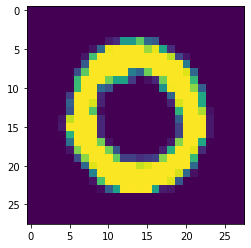

In [56]:
def imshow(image):
    image = image.reshape(28, 28)
    plt.imshow(image)
    
imshow(image)

In [30]:
def preprocess(img):
    return img / 256

print(preprocess(image))

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [57]:
import os
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

In [62]:
class MnistDataset(Dataset):
    def __init__(self, csv_file, transform=None):
        self.frame = pd.read_csv(csv_file)
        self.transform = transform
        
    def __len__(self):
        return len(self.frame)
    
    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
            
        image = self.frame.iloc[idx, 1:]
        image = np.array([image]).astype('float').reshape(28, 28, 1)
        index = self.frame.iloc[idx, 0]
        label = np.zeros(10)
        label[index] = 1
        
        sample = {'image': image, 'label': label}
        
        if self.transform:
            sample = self.transform(sample)
            
        return sample


0 (28, 28, 1) (10,)
1 (28, 28, 1) (10,)
2 (28, 28, 1) (10,)
3 (28, 28, 1) (10,)


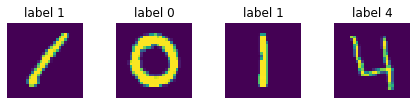

In [67]:
mnist_dataset = MnistDataset(csv_file='data/train.csv')

fig = plt.figure()

for i in range(len(mnist_dataset)):
    sample = mnist_dataset[i]
    print(i, sample['image'].shape, sample['label'].shape)
    
    ax = plt.subplot(1, 4, i+1)
    plt.tight_layout()
    ax.set_title('label {}'.format(np.where(sample['label'] == 1)[0][0]))
    ax.axis('off')
    imshow(sample['image'])
    
    if i == 3:
        break


In [68]:
class ToTensor(object):
    def __call__(self, sample):
        image, label = sample['image'], sample['label']
        image = image.transpose((2, 0, 1))
        return {'image': torch.from_numpy(image), 'label': torch.from_numpy(label)}

In [73]:
if __name__ == '__main__':
    transformed_dataset = MnistDataset(csv_file='data/train.csv', 
                                       transform=transforms.Compose([ToTensor()]))
    dataloader = DataLoader(transformed_dataset, batch_size=4, shuffle=True, num_workers=4)

    def show_batch(sample_batched):
        images_batch, labels_batch = sample_batched['image'], sample_batched['labels']
        batch_size = len(images_batch)
        im_size = images_batch.size(2)
        grid_border_size = 2
        grid = utils.make_grid(images_batch)
        plt.imshow(grid.numpy().transpose((1, 2, 0)))


    for i_batch, sample_batched in enumerate(dataloader):
        print(i_batch, sample_batched['image'].size(),
              sample_batched['label'].size())


BrokenPipeError: [Errno 32] Broken pipe